In [10]:
import os
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Get current working directory instead of __file__
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
from CoAtNet.CoAtNetModel import CoAtNetWheatModel
from EfficientNet.efficientNetModel import EfficientNetWheatModel
from ResNet.ResNetModel import ResNetWheatModel
from simpleCNN.simpleCNNModel import WheatEarModel
from VisionTransformer.VisionTransformerModel import ViTWheatModel
from ConvNextTiny.ConVNextTinyModel import ConvNeXtTinyWheatModel
from DenseNet.DenseNetModel import DenseNet121WheatModel
from EfficientNetV2.efficientNetV2Model import EfficientNetV2SWheatModel
from MobileViT.MobileViTModel import MobileViTWheatModel
from dataLoaderFunc import loadSplitData, createLoader
from modelTestFunc import evaluate_model, test_model

In [11]:
train_df, val_df, test_df = loadSplitData("RGB_DSM_totEarNum.csv")
train_loader, val_loader, test_loader = createLoader(train_df, val_df, test_df)

if torch.backends.mps.is_available():
    device = "mps"  # ✅ Use Apple Metal (Mac M1/M2)
    torch.set_default_tensor_type(torch.FloatTensor)
elif torch.cuda.is_available():
    device = "cuda"  # ✅ Use NVIDIA CUDA (Windows RTX 4060)
else:
    device = "cpu"  # ✅ Default to CPU if no GPU is available
print(f"✅ Using device: {device}")

Train Size: 47840, Validation Size: 5980, Test Size: 5980
Train Batches: 2990, Validation Batches: 374, Test Batches: 374
✅ Using device: cuda


In [9]:
coAtNetModel = CoAtNetWheatModel()
coAtNetModel.load_state_dict(torch.load("./CoAtNet/coatnet_wheat_model.pth"))
coAtNetModel.to(device)
coAtNetModel.eval()
evaluate_model(coAtNetModel, test_loader, device, plot_predictions=True)

KeyboardInterrupt: 

📊 Evaluation Results:
✅ MAE:   8.48
✅ RMSE:  11.48
✅ R²:    0.9856


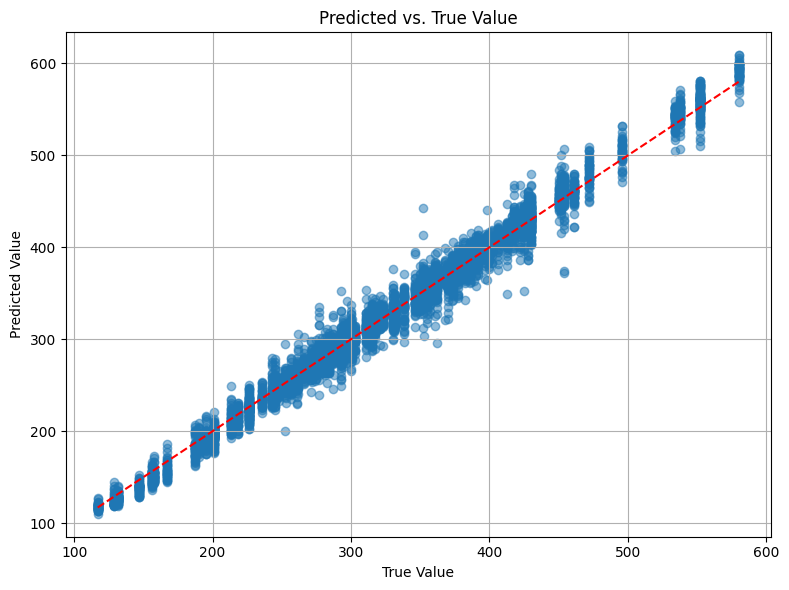

In [4]:
efficientNetModel = EfficientNetWheatModel()
efficientNetModel.load_state_dict(torch.load("./EfficientNet/efficientnet_wheat_model.pth"))
efficientNetModel.to(device)
efficientNetModel.eval()
evaluate_model(efficientNetModel, test_loader, device, plot_predictions=True)

📊 Evaluation Results:
✅ MAE:   14.69
✅ RMSE:  21.38
✅ R²:    0.9502


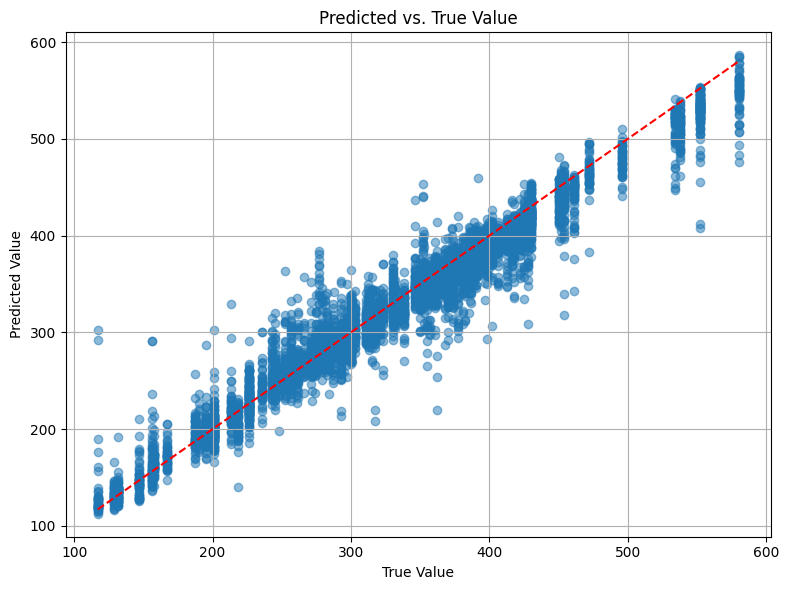

In [5]:
resNetModel = ResNetWheatModel()
resNetModel.load_state_dict(torch.load("./ResNet/best_resnet_wheat_model.pth"))
resNetModel.to(device)
resNetModel.eval()
evaluate_model(resNetModel, test_loader, device, plot_predictions=True)

📊 Evaluation Results:
✅ MAE:   16.38
✅ RMSE:  25.03
✅ R²:    0.9317


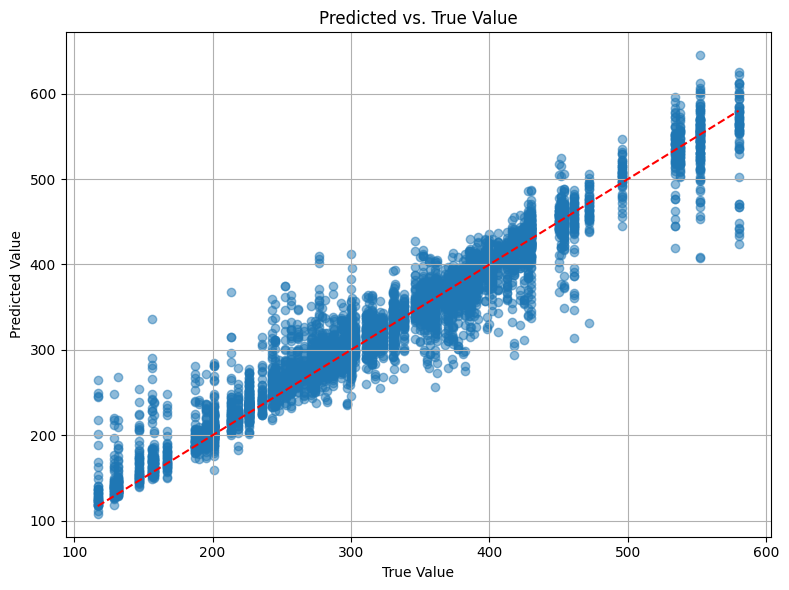

In [6]:
simpleCNNModel = WheatEarModel()
simpleCNNModel.load_state_dict(torch.load("./simpleCNN/cnn_best_wheat_ear_model.pth"))
simpleCNNModel.to(device)
simpleCNNModel.eval()
evaluate_model(simpleCNNModel, test_loader, device, plot_predictions=True)

📊 Evaluation Results:
✅ MAE:   33.27
✅ RMSE:  43.56
✅ R²:    0.7931


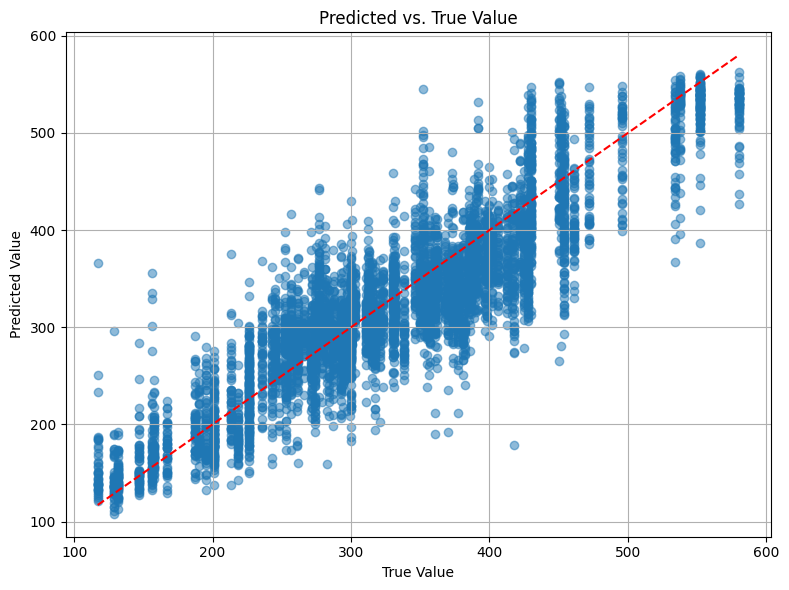

In [7]:
vitModel = ViTWheatModel()
vitModel.load_state_dict(torch.load("./VisionTransformer/vit_wheat_model.pth"))
vitModel.to(device)
vitModel.eval()
evaluate_model(vitModel, test_loader, device, plot_predictions=True)

📊 Evaluation Results:
✅ MAE:   12.63
✅ RMSE:  18.23
✅ R²:    0.9638


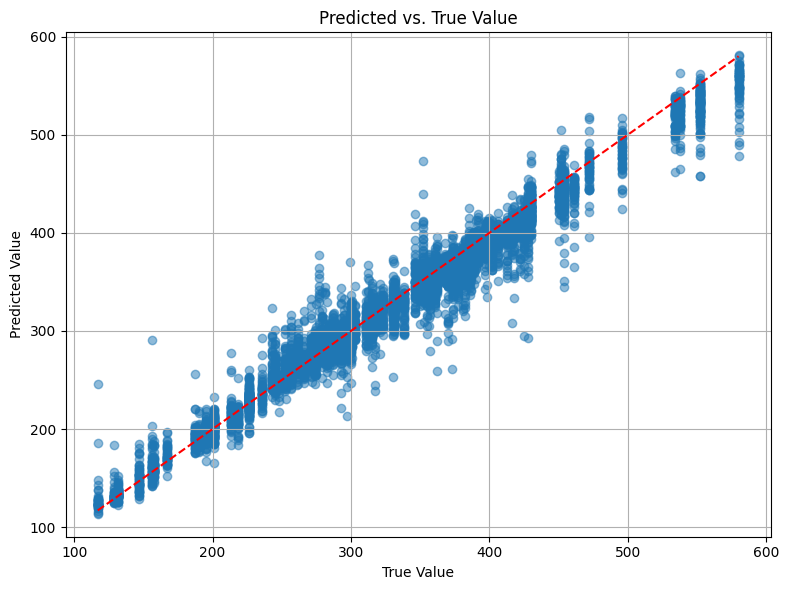

In [8]:
ConvNeXtTinyWheatTestModel = ConvNeXtTinyWheatModel()
ConvNeXtTinyWheatTestModel.load_state_dict(torch.load("./ConvNextTiny/convnext_wheat_model.pth"))
ConvNeXtTinyWheatTestModel.to(device)
ConvNeXtTinyWheatTestModel.eval()
evaluate_model(ConvNeXtTinyWheatTestModel, test_loader, device, plot_predictions=True)

📊 Evaluation Results:
✅ MAE:   10.54
✅ RMSE:  14.85
✅ R²:    0.9760


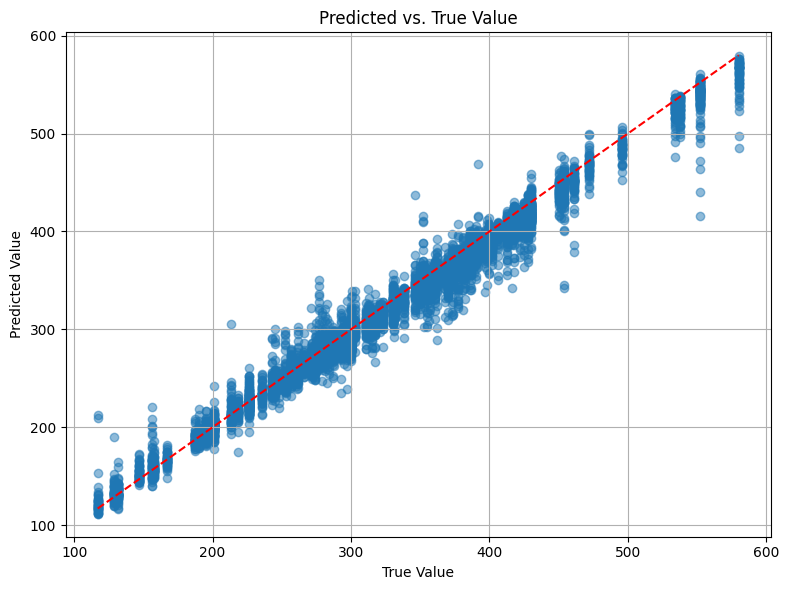

In [ ]:
DenseNet121TestModel = DenseNet121WheatModel() 
DenseNet121TestModel.load_state_dict(torch.load("./DenseNet/densenet_wheat_model.pth"))
DenseNet121TestModel.to(device)
DenseNet121TestModel.eval()
evaluate_model(DenseNet121TestModel, test_loader, device, plot_predictions=True)

📊 Evaluation Results:
✅ MAE:   7.29
✅ RMSE:  9.93
✅ R²:    0.9893


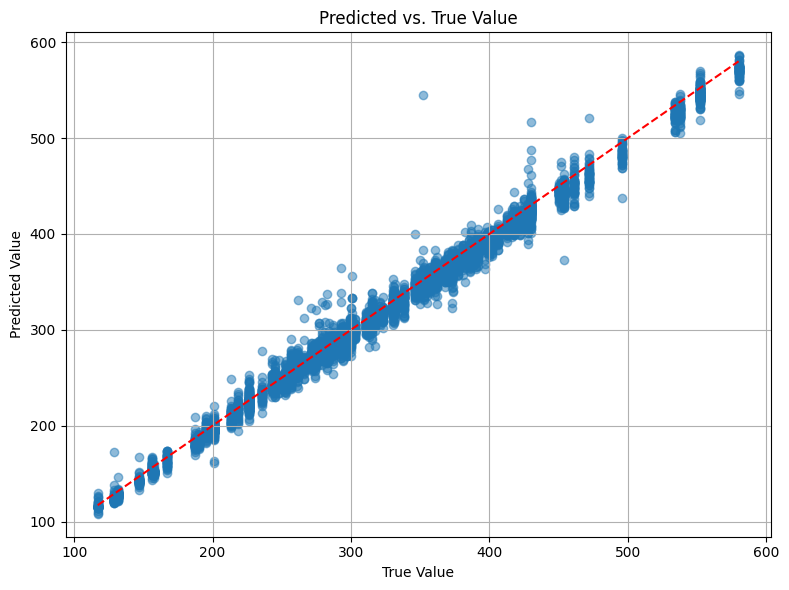

In [4]:
EfficientNetV2STestModel = EfficientNetV2SWheatModel() 
EfficientNetV2STestModel.load_state_dict(torch.load("./EfficientNetV2/efficientNetV2_wheat_model.pth"))
EfficientNetV2STestModel.to(device)
EfficientNetV2STestModel.eval()
evaluate_model(EfficientNetV2STestModel, test_loader, device, plot_predictions=True)

📊 Evaluation Results:
✅ MAE:   10.49
✅ RMSE:  14.32
✅ R²:    0.9777


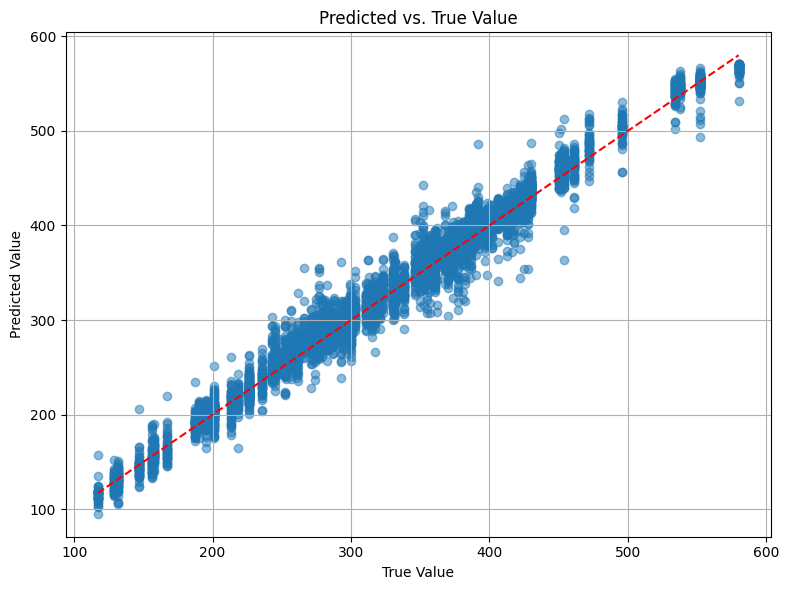

In [14]:
MobileViTTestModel = MobileViTWheatModel() 
MobileViTTestModel.load_state_dict(torch.load("./MobileViT/MobileViT_wheat_model.pth"))
MobileViTTestModel.to(device)
MobileViTTestModel.eval()
evaluate_model(MobileViTTestModel, test_loader, device, plot_predictions=True)


In [5]:
# Run test
preds, actuals = test_model(EfficientNetV2STestModel, test_loader)

In [6]:
# Print sample predictions
sum = 0
count = 0
for p, a in zip(preds, actuals):
    print(f"Predicted: {p:.2f}, Actual: {a:.2f}, Diff: {abs(p-a):.2f}")
    sum += abs(p-a)
    count += 1

print(sum/count)


Predicted: 361.68, Actual: 368.00, Diff: 6.32
Predicted: 548.74, Actual: 552.00, Diff: 3.26
Predicted: 443.69, Actual: 454.00, Diff: 10.31
Predicted: 281.65, Actual: 281.00, Diff: 0.65
Predicted: 447.48, Actual: 472.00, Diff: 24.52
Predicted: 421.38, Actual: 425.00, Diff: 3.62
Predicted: 280.43, Actual: 295.00, Diff: 14.57
Predicted: 426.33, Actual: 430.00, Diff: 3.67
Predicted: 390.83, Actual: 392.00, Diff: 1.17
Predicted: 121.31, Actual: 129.00, Diff: 7.69
Predicted: 290.31, Actual: 257.00, Diff: 33.31
Predicted: 296.36, Actual: 300.00, Diff: 3.64
Predicted: 574.43, Actual: 580.00, Diff: 5.57
Predicted: 304.91, Actual: 315.00, Diff: 10.09
Predicted: 385.62, Actual: 385.00, Diff: 0.62
Predicted: 360.54, Actual: 374.00, Diff: 13.46
Predicted: 423.75, Actual: 418.00, Diff: 5.75
Predicted: 440.62, Actual: 452.00, Diff: 11.38
Predicted: 418.30, Actual: 430.00, Diff: 11.70
Predicted: 385.25, Actual: 386.00, Diff: 0.75
Predicted: 177.08, Actual: 190.00, Diff: 12.92
Predicted: 373.86, Actual